In [1]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Se importa la data a analizar

In [2]:
datos = pd.read_excel("dataSP500.xlsx")

In [3]:
datos.head()

,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen
0,2023-02-01,4070.07,4195.44,3976.90,3991.05,3991.05,63681290000
1,2023-01-01,3853.29,4094.21,3794.33,4076.60,4076.60,80763810000
2,2022-12-01,4087.14,4100.96,3764.49,3839.50,3839.50,85249330000
3,2022-10-31,3901.79,4080.11,3698.15,4080.11,4080.11,92671910000
4,2022-09-30,3609.78,3905.42,3491.58,3871.98,3871.98,95823760000


Se crean 2 columnas. Una con la diferencia entre el valor del cierre y el maximo, otra columna con la diferencia entre el cierre y el minimo.

In [4]:
datos["dif_max"] = datos["Máx."] - datos["Cierre*"]
datos["dif_min"] = datos["Cierre*"] - datos["Mín."]

In [5]:
datos.head()

,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen,dif_max,dif_min
0,2023-02-01,4070.07,4195.44,3976.90,3991.05,3991.05,63681290000,204.39,14.15
1,2023-01-01,3853.29,4094.21,3794.33,4076.60,4076.60,80763810000,17.61,282.27
2,2022-12-01,4087.14,4100.96,3764.49,3839.50,3839.50,85249330000,261.46,75.01
3,2022-10-31,3901.79,4080.11,3698.15,4080.11,4080.11,92671910000,0.00,381.96
4,2022-09-30,3609.78,3905.42,3491.58,3871.98,3871.98,95823760000,33.44,380.40


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           276 non-null    datetime64[ns]
 1   Abrir           276 non-null    float64       
 2   Máx.            276 non-null    float64       
 3   Mín.            276 non-null    float64       
 4   Cierre*         276 non-null    float64       
 5   Cierre ajus.**  276 non-null    float64       
 6   Volumen         276 non-null    int64         
 7   dif_max         276 non-null    float64       
 8   dif_min         276 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 19.5 KB


Observamos si la data tiene valores faltantes, en donde se puede observar que no se presenetan valores faltantes 

In [7]:
datos.isnull().sum()

Fecha             0
Abrir             0
Máx.              0
Mín.              0
Cierre*           0
Cierre ajus.**    0
Volumen           0
dif_max           0
dif_min           0
dtype: int64

Observamos una descripción estadistica de la columna max, asociada al valor maximo alcanzado por la divisa

In [8]:
datos["Máx."].describe()

count     276.000000
mean     1950.232790
std      1014.818416
min       832.980000
25%      1219.747500
50%      1478.010000
75%      2427.487500
max      4818.620000
Name: Máx., dtype: float64

El valor que mas se repite en la columna "min" asociada, al menor valor que ha tenido el indice 

In [9]:
datos["Mín."].mode()[0]

1201.07

Se puede observar que el valor que mas se repite entre la diferencia del valor del cierre del indice y el valor minimo del indice fue de 59

In [10]:
datos["dif_min"].mode()[0]

59.820000000000164

Podemos obervar que el valor que mas se repite entre la diferencia del valor maximo del indice y el valor de cierre del indice fue igual a 0, por lo que se podría sugerir que el valor maximo casi siempre fue el valor del cierre del indice.

In [11]:
datos["dif_max"].mode()[0]

0.0

Información relacionada al maximo de la columna relacionada al maximo precio que ha alcanzado el indice, en los ultimos 23 años

In [12]:
datos.loc[datos["Máx."].idxmax()]

Fecha             2022-01-01 00:00:00
Abrir                         4778.14
Máx.                          4818.62
Mín.                          4222.62
Cierre*                       4515.55
Cierre ajus.**                4515.55
Volumen                   95562890000
dif_max                        303.07
dif_min                        292.93
Name: 13, dtype: object

In [13]:
datos.loc[datos["Máx."].idxmin()]

Fecha             2009-03-01 00:00:00
Abrir                          729.57
Máx.                           832.98
Mín.                           666.79
Cierre*                        797.87
Cierre ajus.**                 797.87
Volumen                  161843640000
dif_max                         35.11
dif_min                        131.08
Name: 167, dtype: object

Observamos el valor maximo con el que ha cerrado la columna relacionada al cierre del valor del indice

In [51]:
datos.loc[datos["Cierre*"].idxmax()]

Fecha             2021-12-01 00:00:00
Abrir                         4602.82
Máx.                          4808.93
Mín.                          4495.12
Cierre*                       4766.18
Cierre ajus.**                4766.18
Volumen                   92750180000
dif_max                         42.75
dif_min                        271.06
Name: 14, dtype: object

Observamos el valor maximo con el que ha cerrado la columna relacionada al cierre del valor del indice

In [52]:
datos.loc[datos["Cierre*"].idxmin()]

Fecha             2009-02-01 00:00:00
Abrir                          823.09
Máx.                           875.01
Mín.                           734.52
Cierre*                        735.09
Cierre ajus.**                 735.09
Volumen                  124492210000
dif_max                        139.92
dif_min                          0.57
Name: 168, dtype: object

In [14]:
datos.loc[datos["Mín."].idxmax()]

Fecha             2021-10-31 00:00:00
Abrir                         4610.62
Máx.                          4743.83
Mín.                           4560.0
Cierre*                        4567.0
Cierre ajus.**                 4567.0
Volumen                   88268840000
dif_max                        176.83
dif_min                           7.0
Name: 15, dtype: object

Distribución de los valores maximos del indice S&P500 desde el año 2000

<AxesSubplot: ylabel='Frequency'>

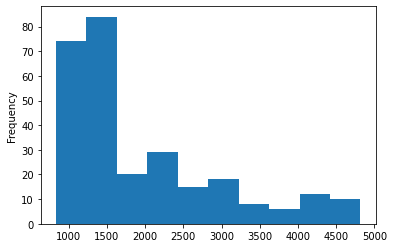

In [15]:
datos["Máx."].plot.hist()

Distribución de los valores minimos del indice S&P500 desde el año 2000

<AxesSubplot: ylabel='Frequency'>

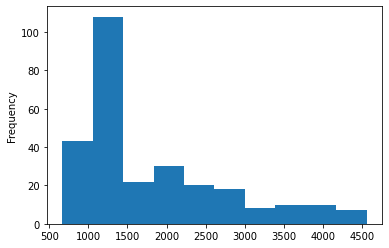

In [16]:
datos["Mín."].plot.hist()

Distribución de los valores minimos del indice S&P500 desde el año 2000

<AxesSubplot: ylabel='Frequency'>

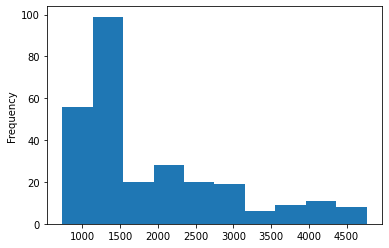

In [53]:
datos["Cierre*"].plot.hist()

correlación de los datos

In [17]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22936\3027322959.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = datos.corr()


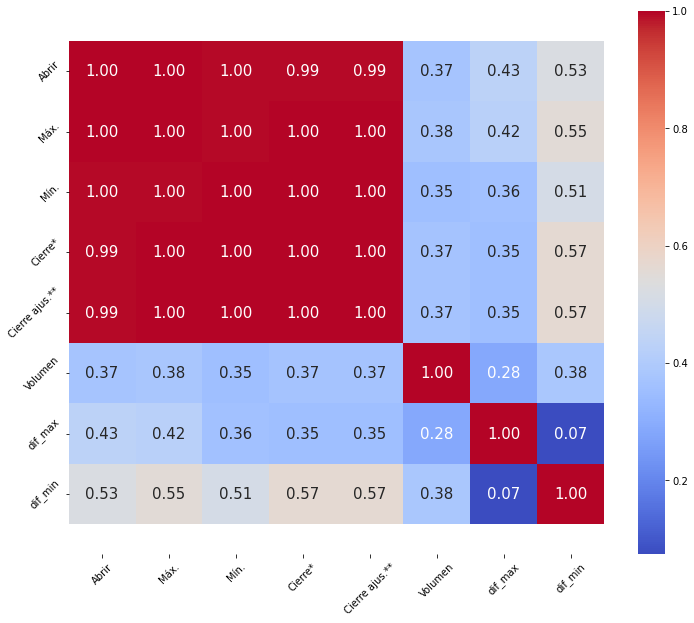

In [18]:
corr = datos.corr()
plot_corre_heatmap(corr)

Comportamiento de la columna "max" durante los ultimos 23 años

<AxesSubplot: xlabel='Fecha', ylabel='Máx.'>

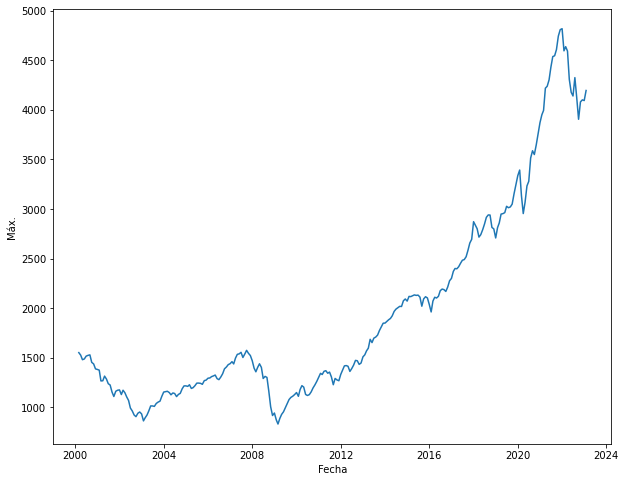

In [19]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Máx.', data = datos)

Comportamiento de la columna "min" durante los ultimos 23 años

<AxesSubplot: xlabel='Fecha', ylabel='Mín.'>

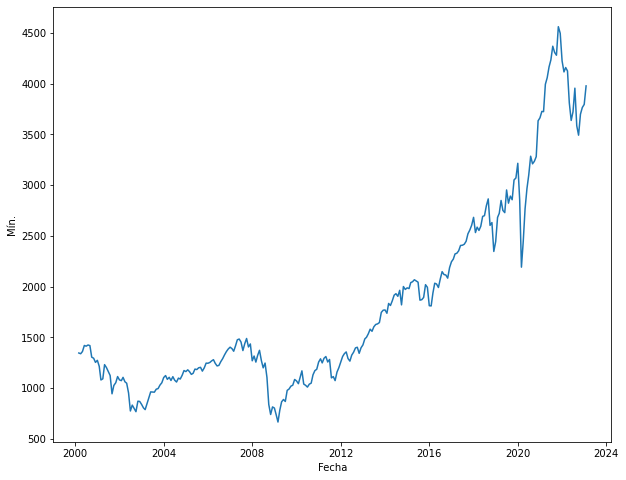

In [20]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Mín.', data = datos)

Comportamiento de la columna "cierre" durante los ultimos 23 años

<AxesSubplot: xlabel='Fecha', ylabel='Cierre*'>

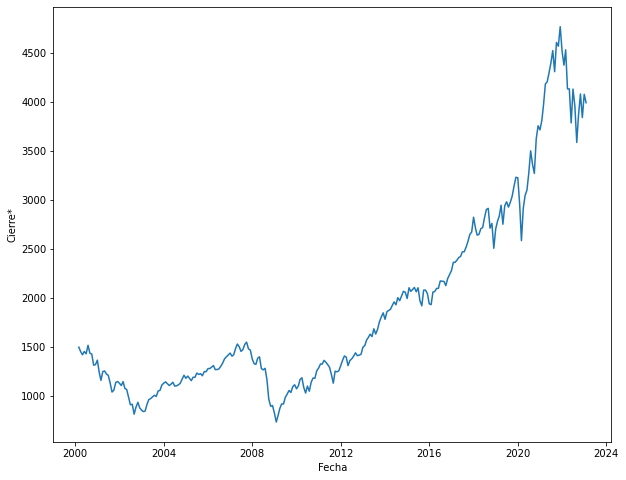

In [21]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Cierre*', data = datos)

Correlación de datos del valor del cierre del indice y el valor maximo del indice

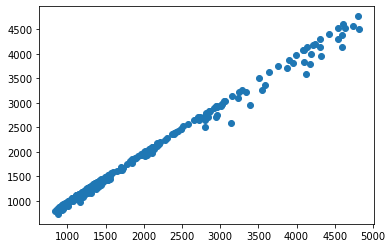

In [30]:
x = datos["Máx."]
y = datos["Cierre*"]

plt.scatter(x, y)

plt.show()

Comportamiento de los valores maximos y minimos

Podemos observar como han seguido un comportamiento similar entre valores maximos(rojos) y minimos(verdes) a lo largo de los años

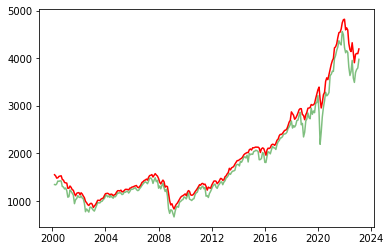

In [41]:
plt.plot(datos["Fecha"], datos["Máx."], color="red") 
plt.plot(datos["Fecha"], datos["Mín."], color="green", alpha=0.5) 
#plt.plot(datos["Fecha"], datos["Cierre*"], color="blue")  

Comparación grafica de valor de apertura del indice vs valor del indice en cierre

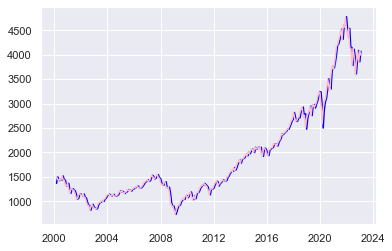

In [57]:
plt.plot(datos["Fecha"], datos["Abrir"], color="blue") 
plt.plot(datos["Fecha"], datos["Cierre*"], color="pink")  

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


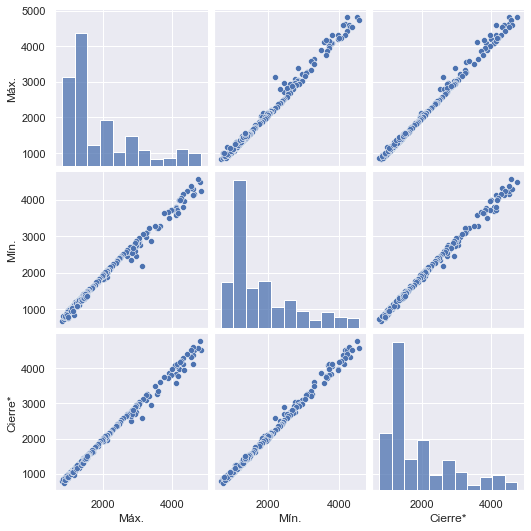

In [55]:
sns.set()
cols = ["Máx.",	"Mín."	,"Cierre*"]
sns.pairplot(datos[cols], size = 2.5)
plt.show();

Se filtran los datos del indice desde el año 2015 hasta el 2023, para poder analizar como se comporto el indice en estos primeros 5 años

In [43]:
datos1 = datos.set_index(['Fecha'])
filtro = datos1.loc["2015-02-01":"2023-02-01"]

In [44]:
filtro.head()

,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen,dif_max,dif_min
Fecha,,,,,,,,
2023-02-01,4070.07,4195.44,3976.90,3991.05,3991.05,63681290000,204.39,14.15
2023-01-01,3853.29,4094.21,3794.33,4076.60,4076.60,80763810000,17.61,282.27
2022-12-01,4087.14,4100.96,3764.49,3839.50,3839.50,85249330000,261.46,75.01
2022-10-31,3901.79,4080.11,3698.15,4080.11,4080.11,92671910000,0.00,381.96
2022-09-30,3609.78,3905.42,3491.58,3871.98,3871.98,95823760000,33.44,380.40


In [24]:
filtro.describe()

,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen,dif_max,dif_min
count,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,97.000000
mean,2999.391753,3105.195567,2889.750412,3015.926186,3015.926186,8.409535e+10,89.269381,126.175773
std,819.882992,856.320831,775.198601,815.647988,815.647988,1.597353e+10,122.048880,107.409147
min,1919.650000,1962.960000,1810.100000,1920.030000,1920.030000,6.303151e+10,0.000000,0.470000
25%,2285.590000,2371.540000,2245.130000,2362.720000,2362.720000,7.321398e+10,15.090000,50.680000
50%,2816.450000,2939.860000,2698.950000,2823.810000,2823.810000,8.062002e+10,34.710000,102.660000
75%,3731.170000,3905.420000,3633.400000,3756.070000,3756.070000,9.225235e+10,112.250000,160.450000
max,4778.140000,4818.620000,4560.000000,4766.180000,4766.180000,1.621854e+11,552.130000,464.940000


Podemos observar como se comporto el valor maximo del precio en los primeros 5 años 

<AxesSubplot: xlabel='Fecha', ylabel='Máx.'>

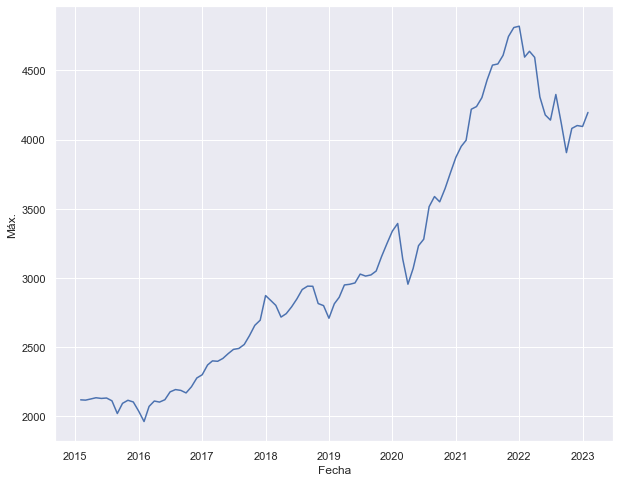

In [59]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Máx.', data = filtro)

Se oberva que el valor del indice tuvo un gran creciemiento desde el año 2020 hasta el 2022 aproximadamente, posterior a esto el valor del indice ha disminuido

<AxesSubplot: xlabel='Fecha', ylabel='Cierre*'>

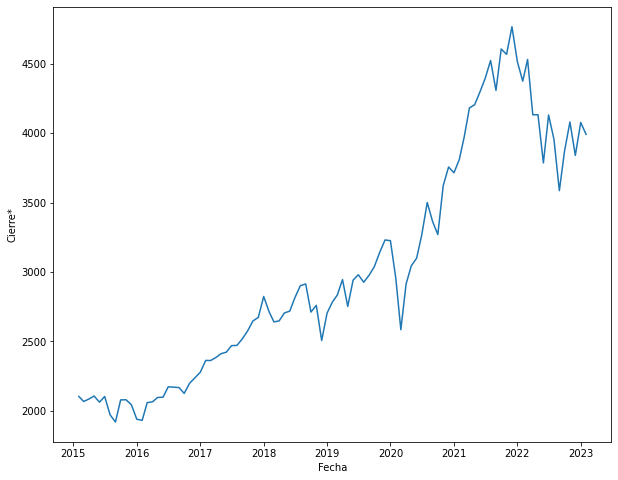

In [46]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Cierre*', data = filtro)

Grafica del valor maximo vs el valor de cierre del indice

<AxesSubplot: xlabel='Fecha', ylabel='Máx.'>

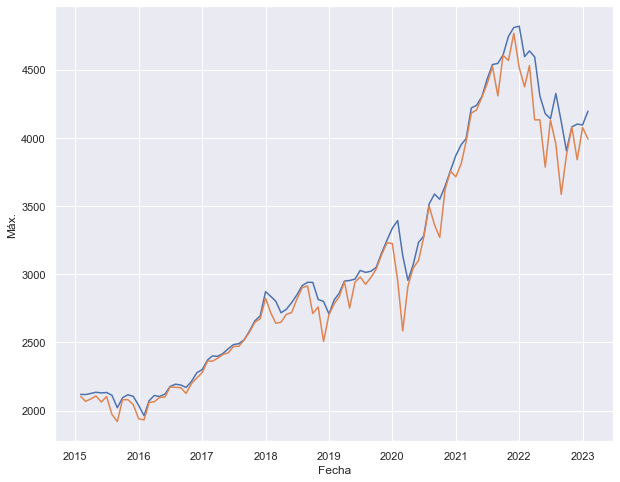

In [60]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Máx.', data = filtro)
sns.lineplot(x = 'Fecha', y = 'Cierre*', data = filtro)

Comportamiento de la columna volumen en los ultimos años

<AxesSubplot: xlabel='Fecha', ylabel='Volumen'>

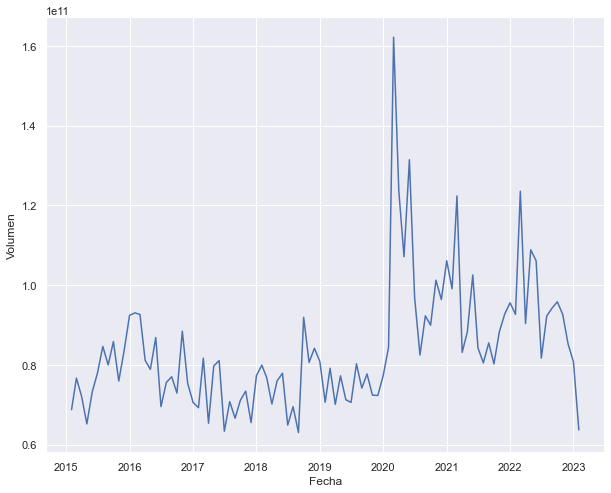

In [56]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Volumen', data = filtro)